In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
import ipywidgets as widgets
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.datasets import make_circles

warnings.filterwarnings('ignore')


## Question 3) Kernel PCA

In previous assignments, you've worked with PCA to find a lower dimensional representation of a data matrix, allowing us to perform tasks like classification more easily.  
As we said in the notes, kernels have a wide range of applications. In this problem, we'll take a look at the application of kernels to PCA.  


### Question 3a)
First, let's look at the half moon data again.

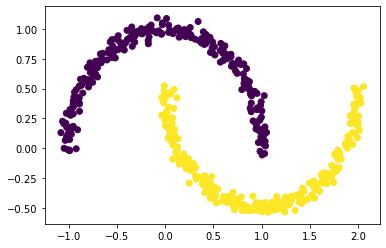

In [2]:
X, y = datasets.make_moons(n_samples = 500, noise = 0.04) 
plt.scatter(X[:, 0], X[:, 1], c = y) 

Run PCA on this dataset with 1 and 2 components, and visualize the result. Fill in the code such that `X_red` has the original data projected onto the first 2 principal components. Answer the following questions.
* **Do you notice anything different about this graph? Why did this change happen?** The student should notice there is a slight change in rotation, this is because PCA looks for the directions without regard to rotation or orientation in the original space.

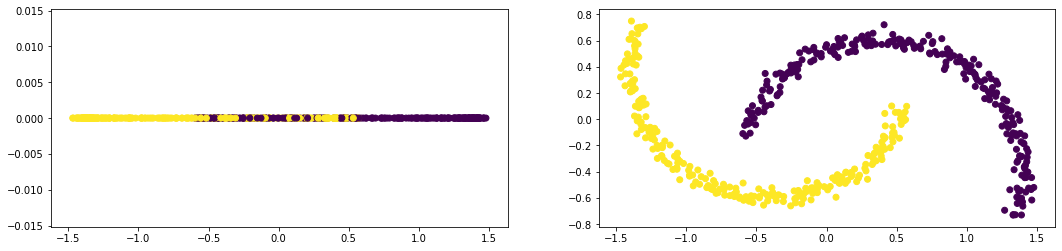

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(18,4))
# START TODO
pca = PCA(n_components=2)
X_red = pca.fit_transform(X)
# END TODO
axes[0].scatter(X_red[:,0], np.zeros(X_red.shape[0]), c = y) 
axes[1].scatter(X_red[:,0], X_red[:,1], c = y) 

PCA, while it is able to identify the important directions in our data, is confined to a linear feature space. This means that we are still stuck with the problem where our dataset is linearly inseparable. As we know, it often helps to lift our features by mapping each datapoint to a higher dimensional space. Kernels will allow us to lift our features without ever having to explicitly compute the higher dimensional space for our data matrix. Instead, we can simply just perform PCA on the Gram matrix K, which will give us the most important directions in this lifted feature space without having to go through the computational complexity of computing it.  
sk-learn has a built in Kernel PCA implementation that we can use on our half moon dataset here https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html  
Complete the following code to finish the function `kernel_pca_poly`, which takes in a value for gamma `g` and computes a 2 component KernelPCA with gamma `g` and the RBF kernel on the data in `X`. 

In [4]:
def kernel_pca_gamma(gamma):
    
    # START TODO
    kernel_pca = KernelPCA(n_components=2, kernel='rbf',gamma=gamma)
    X_red_kernel = kernel_pca.fit_transform(X)
    # END TODO
    
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    axes[0].scatter(X_red_kernel[:,0], np.zeros(X_red_kernel.shape[0]), c = y) 
    axes[1].scatter(X_red_kernel[:,0], X_red_kernel[:,1], c = y) 

    plt.show()



Now run the following code to visualize our results. Play with the gamma parameter and answer the following questions.
* **What does the graph look like as gamma approaches infinity? What about negative infinity?** As gamma approaches infinity, we can see that the data becomes more separated with one class turning almost one dimensional. For negative values, the graph starts to spread out and get clustered around one point. In general, as gamma is increased we know from the equation for an RBF kernel that the kernel function will become very small, with the highest value being assumed when the two vectors passed in are the same. The opposite is true when gamma is very small.
* **What happens when gamma is 0? Why does this make sense?** When gamma is zero, all the values are in one point at (0,0). This is because the kernel function always outputs 1 when gamma is equal to zero, which means that every point is essentially seen as the same. In other words, there are no important directions in the data.
* **What is the value of gamma that visually seems like it would cause the data to be most separable?** A gamma around 15 is reasonable.
* **What method can we use to find an optimal gamma to make this data separable?** We can use cross validation.

In [5]:
g_widget = FloatSlider(min=-10, max=20.0)

interact(kernel_pca_gamma,gamma=g_widget)

interactive(children=(FloatSlider(value=0.0, description='gamma', max=20.0, min=-10.0), Output()), _dom_classe…

<function __main__.kernel_pca_gamma(gamma)>

### Question 3b)
Fill in the code to use a polynomial kernel now, and answer the following questions.
* **Try keeping the degree fixed and changing gamma. What do you notice happens as gamma gets to be a large positive number? What about to be a small negative number? What about 0?** The data is not separable at all with high gamma, with low gamma it is separable but all the purple datapoints are classified as the same. The same behavior occurs as with RBF when gamma is 0.
* **Now keep the gamma fixed and change the degree. What do you notice happens as the degree takes on even and odd values? What about small? What about 0?** When the degree is even, the purple points are projected into a circular disk, but when degree is odd it sort of diverges. This peculiar behavior happens when the polynomial is either even and odd.

In [6]:
def kernel_pca_poly(degree, gamma):
    
    # START TODO
    kernel_pca = KernelPCA(n_components=2, kernel='poly',gamma=gamma,degree=degree)
    X_red_kernel = kernel_pca.fit_transform(X)
    # END TODO
    
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    axes[0].scatter(X_red_kernel[:,0], np.zeros(X_red_kernel.shape[0]), c = y) 
    axes[1].scatter(X_red_kernel[:,0], X_red_kernel[:,1], c = y) 

    plt.show()
g_widget = FloatSlider(min=-10, max=20.0)
d_widget = IntSlider(min=1, max=10)
interact(kernel_pca_poly,gamma=g_widget,degree=d_widget)

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), FloatSlider(value=0.0, descript…

<function __main__.kernel_pca_poly(degree, gamma)>

### Question 3c)
Now let's do some classification with Logistic Regression to see how well we can classify the the original dataset, the dataset projected onto the first two principal components, and the dataset projected using the principal components from kernel PCA. 

First, let's look at the original dataset. Fill in the code in TODO such that we fit a Logistic Regression model and store the weights in a variable called `w`. Calculate the accuracy of the classifier on the dataset and store that in orig_accuracy.

Classifier accuracy:  0.884


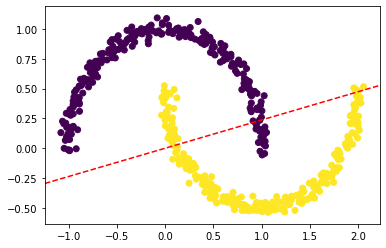

In [7]:
# START TODO
clf = LogisticRegression().fit(X, y)
w = clf.coef_[0]
orig_accuracy = clf.score(X, y)
# END TODO
plt.scatter(X[:, 0], X[:, 1], c = y) 
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * w[0])/w[1]
plt.plot(x_vals, y_vals, '--', c="red")
print ("Classifier accuracy: ", orig_accuracy)

Now do the same for the `X_red` dataset. Answer the following questions.
* **Is the accuracy different?**

Classifier accuracy:  0.882


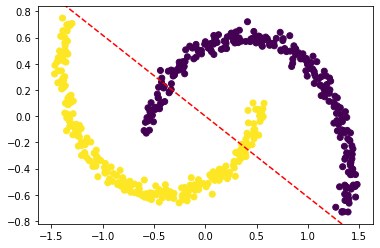

In [8]:
# START TODO
clf = LogisticRegression().fit(X_red, y)
w = clf.coef_[0]
pca_accuracy = clf.score(X_red, y)
# END TODO
plt.scatter(X_red[:,0], X_red[:,1], c = y) 
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * w[0])/w[1]
plt.plot(x_vals, y_vals, '--', c="red")
print ("Classifier accuracy: ", pca_accuracy)

Now let's use kernel PCA. Use PCA with an RBF kernel to transform the dataset and use the value for gamma you visually identified in Question 2b.
* **How's the accuracy this time?** Pretty damn good!

Classifier accuracy:  0.998


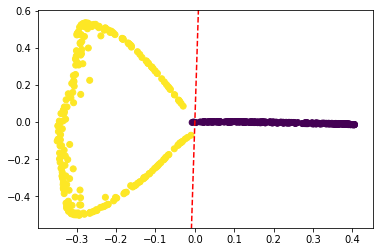

In [9]:
# START TODO
# assuming that gamma is 15
gamma = 17
kernel_pca = KernelPCA(n_components=2, kernel='rbf',gamma=gamma)
X_red_kernel = kernel_pca.fit_transform(X)
gamma = 15
clf = LogisticRegression().fit(X_red_kernel, y)
w = clf.coef_[0]
kpca_accuracy = clf.score(X_red_kernel, y)
# END TODO
plt.scatter(X_red_kernel[:,0], X_red_kernel[:,1], c = y) 
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * w[0])/w[1]
plt.plot(x_vals, y_vals, '--', c="red")
print ("Classifier accuracy: ", kpca_accuracy)